### Channel gradients
The ability to compute gradients of any operation is an essential ingredient of **quantum differentiable programming**.
(see bottom of The ability to compute gradients of any operation is an essential ingredient of quantum differentiable programming. )

Assume HW has only depolarizing channel and we want to use  gradient descent method to find p resulting with the target EV for the bell-circuit

In [34]:
import pennylane as qml
from jax import numpy as np
import jax
import jaxopt
import matplotlib.pyplot as plt
qcstyle="black_white"

jax.config.update("jax_platform_name", "cpu")
jax.config.update('jax_enable_x64', True)

# dev == backend
dev = qml.device('default.mixed', wires=2) # density-matrix


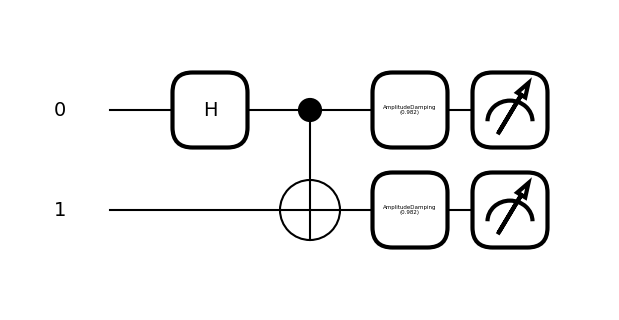

QNode EV=0.965


In [35]:
target_ev = 0.888  # observed expectation value

def sigmoid(x):
    return 1/(1+np.exp(-x))

def cost(x, target):
    return (circuit(x) - target)**2
    
@qml.qnode(dev)
def circuit(x):
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.AmplitudeDamping(sigmoid(x), wires=0)  # p = sigmoid(x)
    qml.AmplitudeDamping(sigmoid(x), wires=1)
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))

x0=4.0
qml.draw_mpl(circuit, decimals=3, style=qcstyle)(x0)
plt.show()
print("QNode EV=%.3f"%circuit(x0) )

In [41]:
opt = jaxopt.GradientDescent(cost, stepsize=0.4, acceleration = False)
steps = 300
params = x
opt_state = opt.init_state(params)
for i in range(steps):
    params, opt_state = opt.update(params, opt_state,target=target_ev)
    if (i + 1) % 20 == 0:
        print("Cost after step {:5d}: {: .7f}".format(i + 1, cost(params,target=target_ev)))

print("Optimized x: {}".format(params))
print(f"Optimized noise parameter p = {sigmoid(params.take(0)):.4f}")
print(f"QNode output after optimization = {circuit(params):.4f}")
print(f"Experimental expectation value = {target_ev}")

Cost after step    20:  0.1503516
Cost after step    40:  0.1468454
Cost after step    60:  0.1056063
Cost after step    80:  0.0353816
Cost after step   100:  0.0125573
Cost after step   120:  0.0056630
Cost after step   140:  0.0029602
Cost after step   160:  0.0016938
Cost after step   180:  0.0010283
Cost after step   200:  0.0006506
Cost after step   220:  0.0004240
Cost after step   240:  0.0002826
Cost after step   260:  0.0001917
Cost after step   280:  0.0001317
Cost after step   300:  0.0000915
Optimized x: 2.6660084608635493
Optimized noise parameter p = 0.9350
QNode output after optimization = 0.8784
Experimental expectation value = 0.888
